# 1. Prepare the dataset

In [43]:
# 1 - DATA MANIPULATION
import pandas as pd
import numpy as np

# 2 - DATA VISUALISATION
import matplotlib.pyplot as plt
import seaborn as sns

# TOKENIZATION
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to /home/patricia/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [2]:
file_path = '/home/patricia/code/ChristineSi/neuroCraft/raw_data/CLEAR Corpus 6.01 - CLEAR Corpus 6.01.csv'
# Load the CSV file into a Pandas DataFrame
df = pd.read_csv(file_path)
# Display the DataFrame
df.head()


,ID,Last Changed,Author,Title,Anthology,URL,Source,Pub Year,Category,Location,...,CAREC_M,CARES,CML2RI,firstPlace_pred,secondPlace_pred,thirdPlace_pred,fourthPlace_pred,fifthPlace_pred,sixthPlace_pred,Kaggle split
0,400,NaN,Carolyn Wells,Patty's Suitors,NaN,http://www.gutenberg.org/cache/epub/5631/pg563...,gutenberg,1914.0,Lit,mid,...,0.11952,0.457534,12.097815,-0.383831,-0.283604,-0.346879,-0.281620,-0.247767,-0.289945,Train
1,401,NaN,Carolyn Wells,Two Little Women on a Holiday,NaN,http://www.gutenberg.org/cache/epub/5893/pg589...,gutenberg,1917.0,Lit,mid,...,0.04921,0.462510,22.550179,-0.260307,-0.209960,-0.061565,-0.234231,-0.201347,-0.156156,Train
2,402,NaN,Carolyn Wells,Patty Blossom,NaN,http://www.gutenberg.org/cache/epub/20945/pg20...,gutenberg,1917.0,Lit,mid,...,0.09724,0.369259,18.125279,-0.615037,-0.530600,-0.527847,-0.550180,-0.565762,-0.538852,Train
3,403,NaN,CHARLES KINGSLEY,THE WATER-BABIES\nA Fairy Tale for a Land-Baby,NaN,http://www.gutenberg.org/files/25564/25564-h/2...,gutenberg,1863.0,Lit,mid,...,0.08856,0.390759,10.959460,-1.528806,-1.525546,-1.471455,-1.265776,-1.422547,-1.393155,Test
4,404,NaN,Charles Kingsley,HOW THE ARGONAUTS WERE DRIVEN INTO THE UNKNOWN...,The Heroes\n or Greek Fairy Tales for my...,http://www.gutenberg.org/files/677/677-h/677-h...,gutenberg,1889.0,Lit,mid,...,0.08798,0.389226,3.195960,-1.335586,-1.321922,-1.163985,-1.122501,-1.185518,-1.271324,Train


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4724 entries, 0 to 4723
Data columns (total 40 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   ID                                  4724 non-null   int64  
 1   Last Changed                        139 non-null    float64
 2   Author                              4724 non-null   object 
 3   Title                               4724 non-null   object 
 4   Anthology                           2712 non-null   object 
 5   URL                                 4724 non-null   object 
 6   Source                              4724 non-null   object 
 7   Pub Year                            4715 non-null   float64
 8   Category                            4724 non-null   object 
 9   Location                            4724 non-null   object 
 10  License                             4724 non-null   object 
 11  MPAA
Max                            4724 no

In [4]:
df.columns


Index(['ID', 'Last Changed', 'Author', 'Title', 'Anthology', 'URL', 'Source',
       'Pub Year', 'Category', 'Location', 'License', 'MPAA\nMax',
       'MPAA \n#Max', 'MPAA\n#Avg', 'Excerpt', 'Google\nWC', 'Joon\nWC v1',
       'British WC', 'British Words', 'Sentence\nCount v1',
       'Sentence\nCount v2', 'Paragraphs', 'BT Easiness', 'BT s.e.',
       'Flesch-Reading-Ease', 'Flesch-Kincaid-Grade-Level',
       'Automated Readability Index', 'SMOG Readability',
       'New Dale-Chall Readability Formula', 'CAREC', 'CAREC_M', 'CARES',
       'CML2RI', 'firstPlace_pred', 'secondPlace_pred', 'thirdPlace_pred',
       'fourthPlace_pred', 'fifthPlace_pred', 'sixthPlace_pred',
       'Kaggle split'],
      dtype='object')

In [5]:
columns_to_drop = ['Last Changed', 'Anthology', 'URL', 'License','MPAA \n#Max', 'MPAA\n#Avg',
                   'firstPlace_pred', 'secondPlace_pred', 'thirdPlace_pred',
                   'fourthPlace_pred', 'fifthPlace_pred', 'sixthPlace_pred']

# Drop the specified columns
df = df.drop(columns=columns_to_drop)
df.head()


,ID,Author,Title,Source,Pub Year,Category,Location,MPAA\nMax,Excerpt,Google\nWC,...,Flesch-Reading-Ease,Flesch-Kincaid-Grade-Level,Automated Readability Index,SMOG Readability,New Dale-Chall Readability Formula,CAREC,CAREC_M,CARES,CML2RI,Kaggle split
0,400,Carolyn Wells,Patty's Suitors,gutenberg,1914.0,Lit,mid,G,When the young people returned to the ballroom...,174,...,81.70,5.95,7.37,8.0,6.55,0.12102,0.11952,0.457534,12.097815,Train
1,401,Carolyn Wells,Two Little Women on a Holiday,gutenberg,1917.0,Lit,mid,PG,"All through dinner time, Mrs. Fayre was somewh...",164,...,80.26,4.86,4.16,7.0,6.25,0.04921,0.04921,0.462510,22.550179,Train
2,402,Carolyn Wells,Patty Blossom,gutenberg,1917.0,Lit,mid,PG,"As Roger had predicted, the snow departed as q...",162,...,79.04,6.03,5.81,9.0,7.31,0.10172,0.09724,0.369259,18.125279,Train
3,403,CHARLES KINGSLEY,THE WATER-BABIES\nA Fairy Tale for a Land-Baby,gutenberg,1863.0,Lit,mid,PG-13,Mr. Grimes was to come up next morning to Sir ...,159,...,44.77,20.51,24.87,12.0,8.56,0.07491,0.08856,0.390759,10.959460,Test
4,404,Charles Kingsley,HOW THE ARGONAUTS WERE DRIVEN INTO THE UNKNOWN...,gutenberg,1889.0,Lit,mid,PG,And outside before the palace a great garden w...,163,...,68.07,12.06,15.47,8.0,7.00,0.06356,0.08798,0.389226,3.195960,Train


In [6]:
#pip install ydata-profiling
# pip install ipywidgets
#import numpy as np
#from ydata_profiling import ProfileReport


In [7]:
#profile = ProfileReport(df, title="Profiling Report")
#profile.to_widgets()    #it takes 3-4 min


In [8]:
# Save the profile report as an HTML file
#profile.to_file("profile_report.html")


## Check for missing values

In [9]:
missing_values_count = df.isnull().sum()
columns_with_missing_values = missing_values_count[missing_values_count > 0].index

print(f"Columns with missing values: {columns_with_missing_values}")


Columns with missing values: Index(['Pub Year', 'British Words'], dtype='object')


In [10]:
# Filter columns with missing values
columns_with_missing_values = missing_values_count[missing_values_count > 0]
# Print columns and their respective counts of missing values
for column in columns_with_missing_values.index:
    count = columns_with_missing_values[column]
    print(f"Column '{column}': {count} missing values")


Column 'Pub Year': 9 missing values
Column 'British Words': 4280 missing values


We don't have British Words on each text fragment. We decide to drop this column.

In [11]:
df.drop(columns=['British Words'])
# Verify that the column has been dropped
print("Columns after dropping 'British Words':", df.columns)


Columns after dropping 'British Words': Index(['ID', 'Author', 'Title', 'Source', 'Pub Year', 'Category', 'Location',
       'MPAA\nMax', 'Excerpt', 'Google\nWC', 'Joon\nWC v1', 'British WC',
       'British Words', 'Sentence\nCount v1', 'Sentence\nCount v2',
       'Paragraphs', 'BT Easiness', 'BT s.e.', 'Flesch-Reading-Ease',
       'Flesch-Kincaid-Grade-Level', 'Automated Readability Index',
       'SMOG Readability', 'New Dale-Chall Readability Formula', 'CAREC',
       'CAREC_M', 'CARES', 'CML2RI', 'Kaggle split'],
      dtype='object')


## Check for duplicates

In [12]:
#Let's check the duplicates (profile reports says 0 duplicated rows)
duplicate_rows = df[df.duplicated()]

# Check if there are any duplicate rows
if duplicate_rows.shape[0] == 0:
    print("There are no duplicate rows in the DataFrame.")
else:
    print(f"There are {duplicate_rows.shape[0]} duplicate rows in the DataFrame.")


There are no duplicate rows in the DataFrame.


Let's explore the numeric, text and categorical variables:

In [13]:
numeric_variables = df.select_dtypes(include=['number'])

# Explore summary statistics for numeric variables
numeric_summary = numeric_variables.describe()
print("Summary statistics for numeric variables:")
print(numeric_summary)


Summary statistics for numeric variables:
                ID     Pub Year   Google\nWC  Joon\nWC v1   British WC  \
count  4724.000000  4715.000000  4724.000000  4724.000000  4724.000000   
mean   4366.347163  1937.886957   171.960203   176.925487     0.129340   
std    1896.363710    60.506795    16.988921    18.173592     0.471049   
min     400.000000  1728.000000   125.000000   135.000000     0.000000   
25%    2769.750000  1884.000000   158.000000   162.000000     0.000000   
50%    4483.500000  1915.000000   174.000000   178.000000     0.000000   
75%    5939.250000  2016.000000   186.000000   191.000000     0.000000   
max    8031.000000  2020.000000   205.000000   220.000000     9.000000   

       Sentence\nCount v1  Sentence\nCount v2   Paragraphs  BT Easiness  \
count         4724.000000         4724.000000  4724.000000  4724.000000   
mean             9.570703            9.752329     2.542337    -0.957639   
std              4.640162            4.681339     1.866298     1.0

Pub Year: 1728-2020\
Google WC, Joon WC v1, British WC: word counts from different sources


## Check for outliers

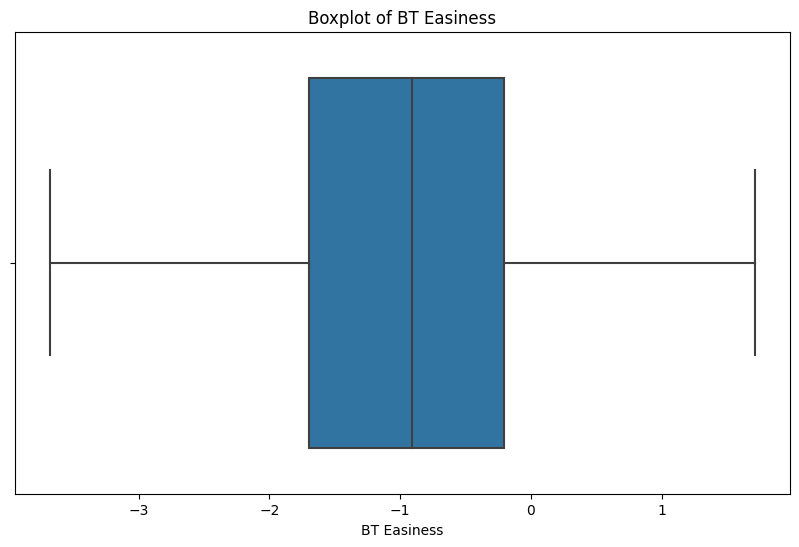

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Add this line to enable inline plotting in Jupyter/IPython
%matplotlib inline

plt.figure(figsize=(10, 6))
sns.boxplot(x='BT Easiness', data=df)
plt.title('Boxplot of BT Easiness')
plt.show()


In [15]:
text_variables = df.select_dtypes(include=['object'])

# Explore unique values and word frequency for text variables
for column in text_variables.columns:
    unique_values = text_variables[column].unique()
    word_frequency = text_variables[column].str.split().explode().value_counts()

    print(f"Column: {column}")
    print("Unique values:", unique_values)
    print("Word frequency:")
    print(word_frequency)
    print("\n")


Column: Author
Unique values: ['Carolyn Wells' 'CHARLES KINGSLEY' 'Charles Kingsley' ...
 'original text by Steve Whitt\nadapted by Jessica Fries-Gaither'
 'Stephen Whitt' 'wikijunior']
Word frequency:
Author
wiki         275
simple       275
wikipedia    274
?            271
&            173
            ... 
Happy          1
Kwamie         1
Ofori          1
Da             1
Mhlophe        1
Name: count, Length: 4848, dtype: int64


Column: Title
Unique values: ["Patty's Suitors" 'Two Little Women on a Holiday' 'Patty Blossom' ...
 'Bugs/Black Widow' 'Solids' 'Anials']
Word frequency:
Title
The          946
the          777
THE          752
of           729
and          454
            ... 
Herd           1
Pet            1
rooster        1
Fireflies      1
Anials         1
Name: count, Length: 8467, dtype: int64


Column: Source
Unique values: ['gutenberg' 'simple.wikipedia' 'kids.frontiersin' 'wikipedia'
 'africanstorybook' 'ck12' 'freekidsbooks' 'commonlit' 'emedia.uen.org'
 'digit

What should we do to handle the class imbalace? (Source and MPAA Max Values)

# 2. Feature Engineering

## Identify features that are known to impact readability for individuals with dislexia

- Left align text, without justification.
- Short simple sentences (60-70 characters).
- Use active rather than passive voice.
- Be concise; avoid using long, dense paragraphs.
- Write in simple clear language using every day words.
- Avoid double negatives.
- Avoid abbreviations where possible; always provide the expanded form when first used.

https://www.bdadyslexia.org.uk/advice/employers/creating-a-dyslexia-friendly-workplace/dyslexia-friendly-style-guide#:~:text=Font%20size%20should%20be%2012,excessive%20it%20can%20reduce%20readability.

- Avoid double spacing after dots (https://en.wikipedia.org/wiki/Sentence_spacing#cite_note-114)

Classification of words in EASY and HARD, based on:
https://www.irjet.net/archives/V8/i4/PIT/ICIETET-15.pdf
- Lenght of the words
- Count of vowels
- Mirror letters --> some people do that some people don't
- Frequency of the words

## 2.1. Text-Based Features

We could look at:
- Word Count (already at the dataset): total number of words per excerpt.
- Unique Word Count: count of distinct words in each excerpt.
- Average Word Length: average length of words in each excerpt.
- Sentence Count (already at the dataset)

### 2.1.1. Word Count

There are three word counters: Joon WC v1, Google WC and British WC.

In [16]:
def avg_word_count(row):
    return row[['Joon\nWC v1', 'Google\nWC']].mean()

# Create a new column
df['Avg Word Count'] = df.apply(avg_word_count, axis=1)
df['Avg Word Count']


0       176.5
1       174.0
2       171.0
3       159.5
4       163.5
        ...  
4719    172.0
4720    177.0
4721    179.5
4722    149.0
4723    144.5
Name: Avg Word Count, Length: 4724, dtype: float64

### 2.1.2. Unique Word Count

In [17]:
def count_unique_words(row):
    words = row['Excerpt'].split()
    return len(set(words))

df['Unique Word Count'] = df.apply(count_unique_words, axis=1)
df['Unique Word Count']


0       114
1       127
2       128
3       110
4       118
       ... 
4719    103
4720    118
4721    128
4722    104
4723    100
Name: Unique Word Count, Length: 4724, dtype: int64

### 2.1.3. Word Length

In [18]:
def avg_word_length(excerpt):
    word_lengths = [len(word) for word in excerpt.split()]
    return sum(word_lengths) / len(word_lengths) if len(word_lengths) > 0 else 0

# New column 'Avg Word Length'
df['Avg Word Length'] = df['Excerpt'].apply(avg_word_length)
df['Avg Word Length']


0       4.547486
1       4.550296
2       4.475904
3       4.339623
4       4.548780
          ...   
4719    4.508671
4720    4.629213
4721    4.784530
4722    4.766667
4723    5.068493
Name: Avg Word Length, Length: 4724, dtype: float64

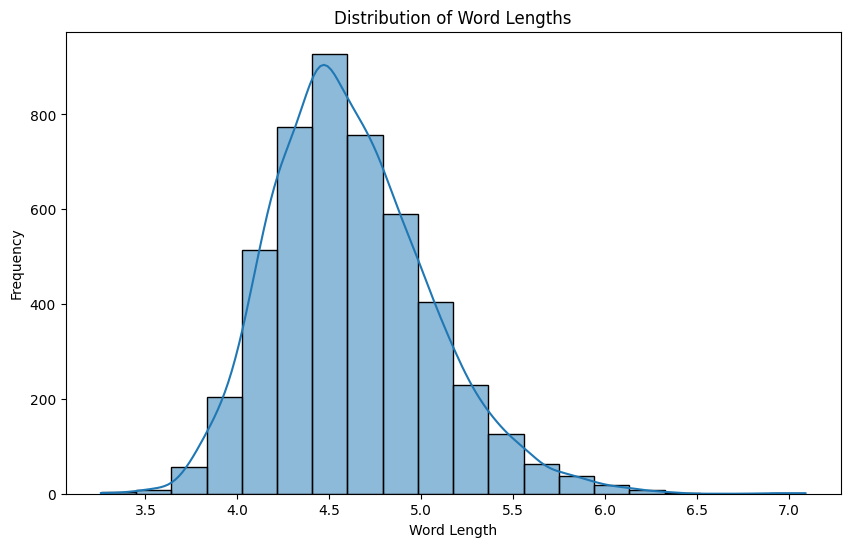

In [19]:
# Plot the distribution of word lengths
plt.figure(figsize=(10, 6))
sns.histplot(df['Avg Word Length'], bins=20, kde=True)
plt.title('Distribution of Word Lengths')
plt.xlabel('Word Length')
plt.ylabel('Frequency')
plt.show()


## 2.2. Complexity Features

### 2.2.1. Average Syllables per Word

In [20]:
#pip install textstat # https://pypi.org/project/textstat/
#pip install -U spacy
import spacy  # For syntactic analysis


In [21]:
import textstat  # For readability indices
#df['Syllables_Per_Word'] = df['Excerpt'].apply(lambda x: [textstat.syllable_count(word) for word in x.split()])
df['Avg Syllables Per Word'] = df['Excerpt'].apply(lambda x: np.mean([textstat.syllable_count(word) for word in x.split()]))
df['Avg Syllables Per Word']


0       1.284916
1       1.331361
2       1.277108
3       1.226415
4       1.195122
          ...   
4719    1.208092
4720    1.280899
4721    1.309392
4722    1.340000
4723    1.486301
Name: Avg Syllables Per Word, Length: 4724, dtype: float64

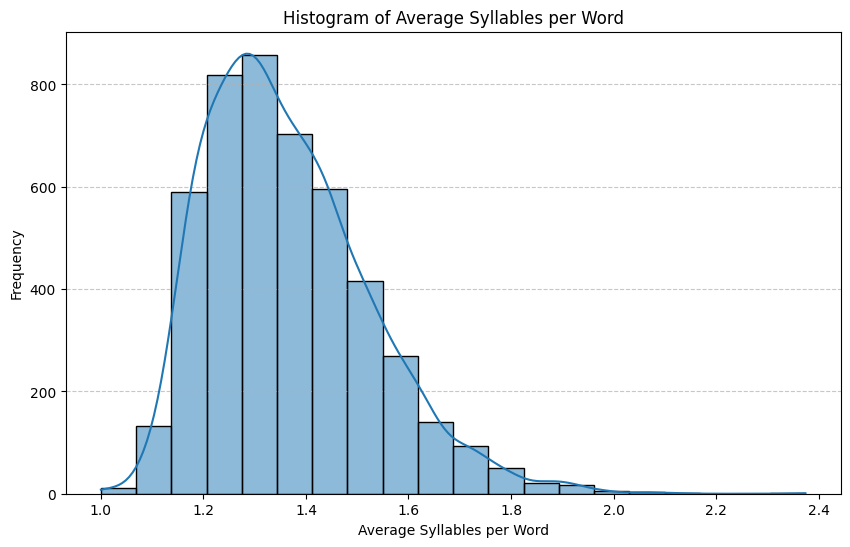

In [22]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Avg Syllables Per Word'], bins=20, kde=True)
plt.title('Histogram of Average Syllables per Word')
plt.xlabel('Average Syllables per Word')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


### 2.2.2. Average Vowels per Word

In [24]:
def count_vowels(word):
    vowels = set("AEIOUaeiou")
    return sum(1 for char in word if char in vowels)

# New columns:
df['Avg Vowel Count Per Word'] = df['Excerpt'].apply(lambda x: np.mean([count_vowels(word) for word in x.split()]) if x else 0)
df['Total Vowels Per Excerpt'] = df['Excerpt'].apply(lambda x: sum(count_vowels(word) for word in x.split()) if x else 0)
result_columns = df[['Avg Vowel Count Per Word', 'Total Vowels Per Excerpt']]
print(result_columns)


      Avg Vowel Count Per Word  Total Vowels Per Excerpt
0                     1.620112                       290
1                     1.603550                       271
2                     1.554217                       258
3                     1.534591                       244
4                     1.603659                       263
...                        ...                       ...
4719                  1.479769                       256
4720                  1.488764                       265
4721                  1.662983                       301
4722                  1.793333                       269
4723                  1.760274                       257

[4724 rows x 2 columns]


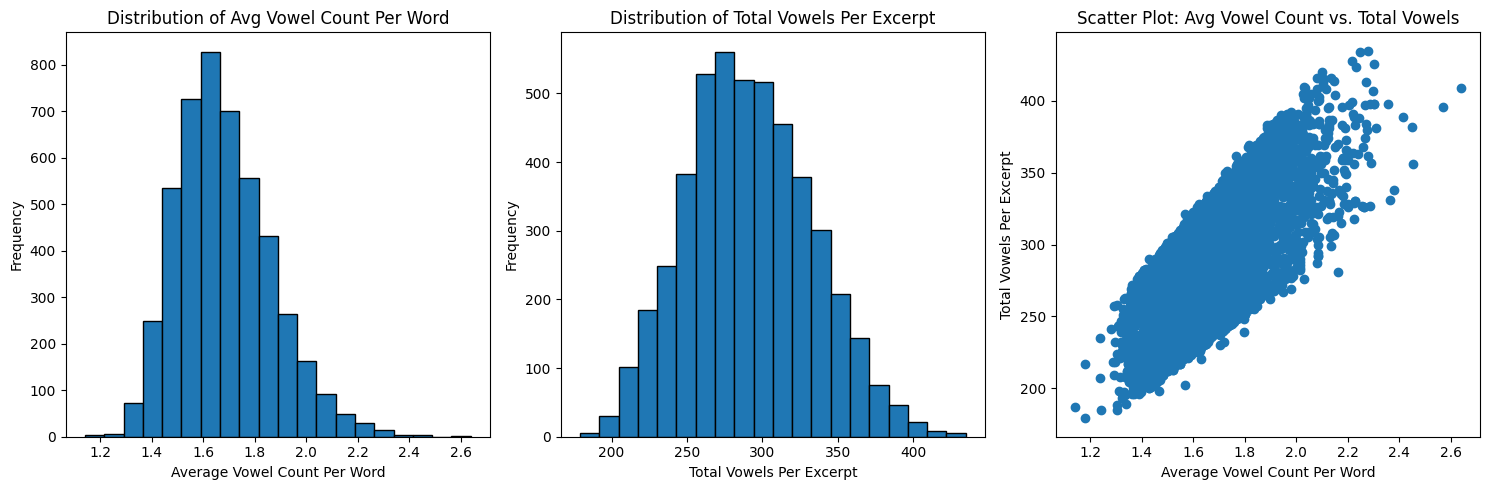

In [25]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot 1: Distribution of Average Vowel Count Per Word
axes[0].hist(df['Avg Vowel Count Per Word'], bins=20, edgecolor='black')
axes[0].set_xlabel('Average Vowel Count Per Word')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of Avg Vowel Count Per Word')

# Plot 2: Distribution of Total Vowels Per Excerpt
axes[1].hist(df['Total Vowels Per Excerpt'], bins=20, edgecolor='black')
axes[1].set_xlabel('Total Vowels Per Excerpt')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Distribution of Total Vowels Per Excerpt')

# Plot 3: Scatter Plot: Avg Vowel Count Per Word vs. Total Vowels Per Excerpt
axes[2].scatter(df['Avg Vowel Count Per Word'], df['Total Vowels Per Excerpt'])
axes[2].set_xlabel('Average Vowel Count Per Word')
axes[2].set_ylabel('Total Vowels Per Excerpt')
axes[2].set_title('Scatter Plot: Avg Vowel Count vs. Total Vowels')

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()


### 2.2.3. Punctuation Count

In [28]:
import string

def count_punctuation_frequency(excerpt):
    punctuation_counts = {punctuation: 0 for punctuation in string.punctuation}

    for char in excerpt:
        if char in punctuation_counts:
            punctuation_counts[char] += 1

    return punctuation_counts

# new column 'Punctuation Frequency'
df['Total Punctuation Count'] = df['Excerpt'].apply(count_punctuation_frequency).apply(lambda x: sum(x.values()))
df['Total Punctuation Count']


0       27
1       56
2       47
3       31
4       33
        ..
4719    21
4720    36
4721    32
4722    32
4723    41
Name: Total Punctuation Count, Length: 4724, dtype: int64

### 2.2.4. Average Sentence Length

In [49]:
def avg_sentence_length(row):
    total_word_count = row[['Joon\nWC v1', 'Google\nWC']].mean()
    sentence_count = row[['Sentence\nCount v1', 'Sentence\nCount v2']].mean()
    return total_word_count / sentence_count if sentence_count != 0 else 0
# new column 'Avg Sentence Length'
df['Avg Sentence Length'] = df.apply(avg_sentence_length, axis=1)
df['Avg Sentence Length']


0       16.045455
1       11.600000
2       15.545455
3       53.166667
4       32.700000
          ...    
4719    10.117647
4720    10.411765
4721    10.558824
4722    12.416667
4723    11.115385
Name: Avg Sentence Length, Length: 4724, dtype: float64

In [53]:
df['Excerpt'][4]


'And outside before the palace a great garden was walled round, filled full of stately fruit-trees, gray olives and sweet figs, and pomegranates, pears, and apples, which bore the whole year round. For the rich south-west wind fed them, till pear grew ripe on pear, fig on fig, and grape on grape, all the winter and the spring. And at the farther end gay flower-beds bloomed through all seasons of the year; and two fair fountains rose, and ran, one through the garden grounds, and one beneath the palace gate, to water all the town. Such noble gifts the heavens had given to Alcinous the wise.\nSo they went in, and saw him sitting, like Poseidon, on his throne, with his golden sceptre by him, in garments stiff with gold, and in his hand a sculptured goblet, as he pledged the merchant kings; and beside him stood Arete, his wise and lovely queen, and leaned against a pillar as she spun her golden threads.'

## 2.3. Frequency-Based Features

### 2.3.1. Word Frequency

In [29]:
from collections import Counter

def count_word_frequency(excerpt):
    words = excerpt.split()
    word_counts = Counter(words)
    return word_counts

df['Word Frequency'] = df['Excerpt'].apply(count_word_frequency)
df['Word Frequency']


0       {'When': 1, 'the': 16, 'young': 1, 'people': 1...
1       {'All': 1, 'through': 1, 'dinner': 1, 'time,':...
2       {'As': 1, 'Roger': 3, 'had': 1, 'predicted,': ...
3       {'Mr.': 1, 'Grimes': 1, 'was': 4, 'to': 7, 'co...
4       {'And': 2, 'outside': 1, 'before': 1, 'the': 1...
                              ...                        
4719    {'The': 6, 'name': 1, 'Monarch': 4, 'means': 1...
4720    {'Walking': 2, 'Sticks': 1, 'are': 8, 'long,':...
4721    {'A': 1, 'Black': 3, 'Widow': 1, 'is': 2, 'a':...
4722    {'Solids': 1, 'are': 9, 'shapes': 2, 'that': 2...
4723    {'Animals': 3, 'are': 5, 'made': 1, 'of': 5, '...
Name: Word Frequency, Length: 4724, dtype: object

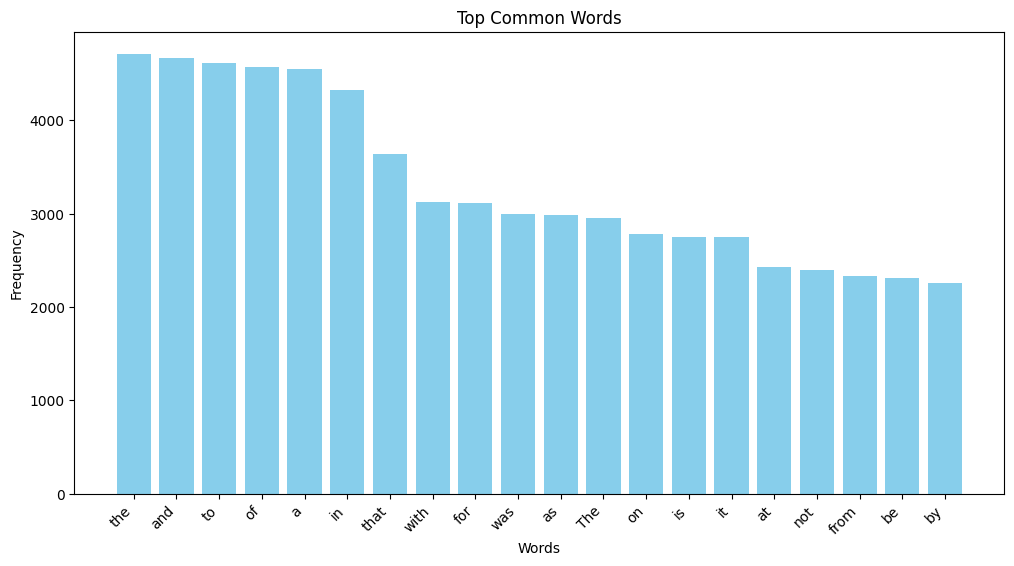

In [30]:
def plot_common_words_bar(excerpt, top_n=20):
    common_word_frequency = Counter(excerpt)
    common_words = [word for word, count in common_word_frequency.most_common(top_n)]
    common_counts = [count for word, count in common_word_frequency.most_common(top_n)]

    plt.figure(figsize=(12, 6))
    plt.bar(common_words, common_counts, color='skyblue')
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.title('Top Common Words')
    plt.xticks(rotation=45, ha='right')
    plt.show()

# Ensure 'Word Frequency' is a list of dictionaries
df['Word Frequency'] = df['Excerpt'].apply(count_word_frequency).tolist()

# Convert the 'Word Frequency' column to a flat list of dictionaries and then sum
common_word_frequency = [dicts for sublist in df['Word Frequency'] for dicts in sublist]
top_common_words = 20
plot_common_words_bar(common_word_frequency, top_n=top_common_words)


### 2.3.2. Rare Words Count

In [32]:
def find_rare_words(excerpt, threshold=1):
    words = excerpt.split()
    word_counts = Counter(words)
    rare_words = [word for word, count in word_counts.items() if count < threshold]
    return rare_words

# new column 'Rare Words' with a threshold of 5
df['Rare Words'] = df['Excerpt'].apply(find_rare_words, threshold=2)
df['Rare Words']


0       [When, young, people, returned, ballroom,, pre...
1       [All, through, dinner, time,, Fayre, somewhat,...
2       [As, had, predicted,, snow, departed, quickly,...
3       [Mr., Grimes, up, next, morning, Sir, John, Ha...
4       [outside, before, great, was, walled, round,, ...
                              ...                        
4719    [name, means, “king”., An, adult, Butterfly, 1...
4720    [Sticks, long,, thin,, slow-moving, bugs,, tha...
4721    [A, Widow, spider., It, orange, that, looks, h...
4722    [Solids, you, can, actually, touch., They, thr...
4723    [made, many, cells., eat, things, digest, them...
Name: Rare Words, Length: 4724, dtype: object

## 2.4. Structural Features

### 2.4.1. Paragraph Count

In [33]:
df['Paragraphs']


0       6
1       6
2       5
3       1
4       2
       ..
4719    3
4720    3
4721    4
4722    3
4723    4
Name: Paragraphs, Length: 4724, dtype: int64

### 2.4.2. Average Caracters per Sentence

In [34]:
import string
from nltk.tokenize import sent_tokenize

import nltk
nltk.download('stopwords')

def count_characters_per_sentence(excerpt):
    # Tokenize the text into sentences
    sentences = sent_tokenize(excerpt)

    # Count the number of characters in each sentence
    char_counts_per_sentence = [len(sentence) for sentence in sentences]

    return char_counts_per_sentence

# new column 'Characters Per Sentence'
df['Characters Per Sentence'] = df['Excerpt'].apply(count_characters_per_sentence)
df['Characters Per Sentence']


[nltk_data] Downloading package stopwords to
[nltk_data]     /home/patricia/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


0        [92, 56, 128, 131, 108, 69, 67, 22, 142, 81, 86]
1       [120, 139, 125, 13, 45, 8, 17, 29, 89, 92, 104...
2         [154, 87, 91, 94, 159, 20, 53, 100, 37, 17, 86]
3                                         [157, 173, 516]
4                                [196, 130, 205, 60, 314]
                              ...                        
4719    [30, 52, 38, 60, 45, 45, 62, 47, 43, 49, 62, 6...
4720    [93, 36, 38, 72, 50, 56, 63, 64, 74, 102, 51, ...
4721    [38, 58, 76, 54, 109, 69, 61, 40, 48, 42, 33, ...
4722    [46, 79, 66, 51, 74, 64, 73, 60, 90, 40, 126, 84]
4723    [31, 39, 22, 102, 37, 63, 28, 63, 75, 87, 178,...
Name: Characters Per Sentence, Length: 4724, dtype: object

## 2.5. Metadata Features

### 2.5.1. Number of works by author

In [35]:
def count_works_by_author(author, author_column):
    return author_column.apply(lambda x: sum(1 for a in x if a == author))

author_works_count = df.groupby('Author')['Author'].count().reset_index(name='Works Count')
print(author_works_count)


                                                 Author  Works Count
0                                       "Engineering"?             1
1                                        "Photo News."             1
2                                       "The Engineer"?            1
3                                                     ?          271
4     A British Surgeon, in The London Times, Dec. 2...            1
...                                                 ...          ...
2404  the following editorial article appeared early...            1
2405  the following official communication was teleg...            1
2406                                     thomas carlyle            3
2407                                         wikijunior           13
2408                                          wikipedia          274

[2409 rows x 2 columns]


In [36]:
author_works_count = df['Author'].value_counts().reset_index()
author_works_count.columns = ['Author', 'Works Count']
print(author_works_count)


                                     Author  Works Count
0                               simple wiki          275
1                                 wikipedia          274
2                                         ?          271
3                             USHistory.org           28
4                           CommonLit Staff           16
...                                     ...          ...
2404                            Tessa Welch            1
2405                                 Sudhir            1
2406                  Sayed Ashique Mahmood            1
2407  Samantha Cutler, Thea Nicole de Klerk            1
2408             Austro-Hungarian statesman            1

[2409 rows x 2 columns]


## 2.6. Statistical Features

### 2.6.1. Standard Deviation of Word Length

In [37]:
def word_length_std(excerpt):
    word_lengths = [len(word) for word in excerpt.split()]
    return np.std(word_lengths) if len(word_lengths) > 0 else 0

# New column 'Word Length Std'
df['Word Length Std'] = df['Excerpt'].apply(word_length_std)
df['Word Length Std']


0       2.227741
1       2.310028
2       2.197210
3       2.341397
4       2.147900
          ...   
4719    2.272272
4720    2.227923
4721    2.411525
4722    3.398856
4723    2.830019
Name: Word Length Std, Length: 4724, dtype: float64

### 2.6.2. Variability in sentence lengths

In [38]:
def sentence_length_variation(row):
    sentence_lengths = count_characters_per_sentence(row['Excerpt'])
    return np.std(sentence_lengths)

df['Sentence Length Variation'] = df.apply(sentence_length_variation, axis=1)
df['Sentence Length Variation']


0        34.375178
1        45.797914
2        45.363727
3       165.591868
4        84.536383
           ...    
4719     15.489923
4720     19.731941
4721     20.925804
4722     22.009310
4723     40.490922
Name: Sentence Length Variation, Length: 4724, dtype: float64

## 2.7. Domain-Specific Features

In [ ]:
# Readibility Scores: we have readibility indices in the dataset


In [ ]:
# Analyse the sentiment of the text?


## 2.8. Temporal Features

In [39]:
# Convert 'Pub Year' to a categorical variable representing decades
df['Decade of Publication'] = pd.cut(df['Pub Year'], bins=range(1790, 2030, 10), labels=range(1790, 2030, 10)[:-1])

# new 'Decade of Publication' column
df[['Pub Year', 'Decade of Publication']].head()


,Pub Year,Decade of Publication
0,1914.0,1910
1,1917.0,1910
2,1917.0,1910
3,1863.0,1860
4,1889.0,1880


In [40]:
df[['Decade of Publication']].value_counts()


Decade of Publication
2010                     1525
1910                      864
1880                      622
1870                      454
1900                      330
1890                      291
1920                      212
1850                       93
1860                       92
2000                       90
1840                       41
1940                       19
1830                       13
1810                       12
1990                       10
1950                        9
1960                        8
1930                        8
1980                        6
1970                        5
1790                        4
1820                        3
1800                        0
Name: count, dtype: int64

## 2.9. Interation Features

In [41]:
# It migth be useful for some models:
def interaction_word_count_avg_word_length(row):
    return row['Avg Word Count'] * row['Avg Word Length']

df['Interaction Word Count Avg Word Length'] = df.apply(interaction_word_count_avg_word_length, axis=1)
df['Interaction Word Count Avg Word Length']


0       802.631285
1       791.751479
2       765.379518
3       692.169811
4       743.725610
           ...    
4719    775.491329
4720    819.370787
4721    858.823204
4722    710.233333
4723    732.397260
Name: Interaction Word Count Avg Word Length, Length: 4724, dtype: float64

## 2.10. Lexical diversity

In [51]:
# https://pypi.org/project/lexical-diversity/
#pip install lexical-diversity
from lexical_diversity import lex_div as ld

df['Lexical Diversity'] = df['Excerpt'].apply(lambda x: ld.ttr(ld.flemmatize(" ".join(x.split()))))

# Display the DataFrame with the new 'Lexical Diversity' column
print(df[['Excerpt', 'Lexical Diversity']])


                                                Excerpt  Lexical Diversity
0     When the young people returned to the ballroom...           0.547486
1     All through dinner time, Mrs. Fayre was somewh...           0.656805
2     As Roger had predicted, the snow departed as q...           0.668675
3     Mr. Grimes was to come up next morning to Sir ...           0.610063
4     And outside before the palace a great garden w...           0.652439
...                                                 ...                ...
4719  The name Monarch means “king”. An adult Monarc...           0.473988
4720  Walking Sticks are long, thin, and slow-moving...           0.544944
4721  A Black Widow is a shiny black spider. It has ...           0.552486
4722  Solids are shapes that you can actually touch....           0.586667
4723  Animals are made of many cells. They eat thing...           0.589041

[4724 rows x 2 columns]


## 2.11. Morphological Features